In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('movies.csv')
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [3]:
rating=pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
import datetime

In [5]:
data=pd.merge(df,rating,on='movieId',how='inner')
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
96806,161582,Hell or High Water (2016),Crime|Drama,610,4.0,1493847759
96807,161594,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,184,3.5,1537107946
96808,161830,Body (2015),Drama|Horror|Thriller,448,1.0,1472493010
96809,161918,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,448,1.5,1472929873


In [6]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [7]:
data=data.drop(['movieId','userId','timestamp'],axis=1)
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [8]:
data=pd.pivot_table(data,index=['title','genres'],aggfunc='mean')
data.reset_index(level=['title','genres'],inplace=True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


C:\Users\RAUNAK GHOSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


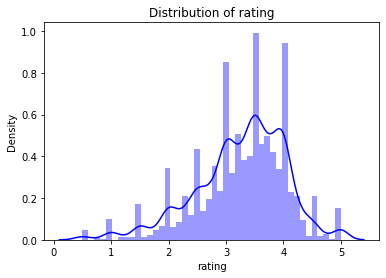

In [9]:
sns.distplot(data['rating'],color='blue')
plt.title('Distribution of rating')
plt.show()

In [10]:
data['y']=data['title'].str.split(' ')
data['year']=data['y'].apply(lambda x :x[-1])
data.head()

,title,genres,rating,y,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,"['Hellboy':, The, Seeds, of, Creation, (2004)]",(2004)
1,'Round Midnight (1986),Drama|Musical,3.500000,"['Round, Midnight, (1986)]",(1986)
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,"['Salem's, Lot, (2004)]",(2004)
3,'Til There Was You (1997),Drama|Romance,4.000000,"['Til, There, Was, You, (1997)]",(1997)
4,"'burbs, The (1989)",Comedy,3.176471,"['burbs,, The, (1989)]",(1989)


In [11]:
data=data.drop(['y'],axis=1)
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,(2004)
1,'Round Midnight (1986),Drama|Musical,3.500000,(1986)
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,(2004)
3,'Til There Was You (1997),Drama|Romance,4.000000,(1997)
4,"'burbs, The (1989)",Comedy,3.176471,(1989)


In [12]:
data['year']=data['year'].str.strip(')')
data['year']=data['year'].str.strip('(')
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [16]:
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
2000    225
       ... 
Road      1
1920      1
1917      1
1902      1
          1
Name: year, Length: 103, dtype: int64